In [510]:
import  numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [512]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35,0,1-2 Year,Yes,65101,124,187,0
1,1,Male,43,1,28,0,> 2 Years,Yes,58911,26,288,1
2,2,Female,25,1,14,1,< 1 Year,No,38043,152,254,0
3,3,Female,35,1,1,0,1-2 Year,Yes,2630,156,76,0
4,4,Female,36,1,15,1,1-2 Year,No,31951,152,294,0


In [415]:
df.shape

(604, 12)

In [514]:
df['Response'].value_counts()

Response
0    537
1     67
Name: count, dtype: int64

## Pre-Processing & EDA

In [516]:
df.duplicated().sum()

0

In [518]:
# # Drop duplicate rows
# df = df.drop_duplicates()

# # Verify the number of duplicates
# duplicates_after = df.duplicated().sum()
# print(f"Number of duplicates after removal: {duplicates_after}")


In [ ]:
## OUTLIER - - EDA

<Axes: >

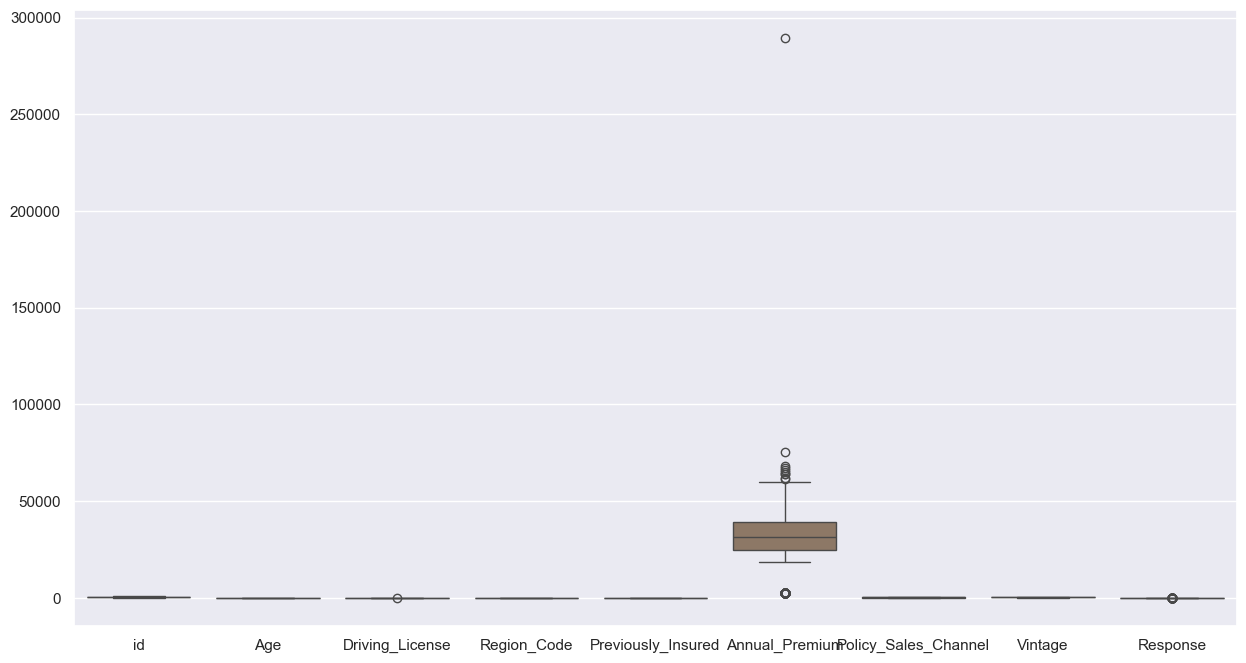

In [520]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    604 non-null    int64 
 1   Gender                604 non-null    object
 2   Age                   604 non-null    int64 
 3   Driving_License       604 non-null    int64 
 4   Region_Code           604 non-null    int64 
 5   Previously_Insured    604 non-null    int64 
 6   Vehicle_Age           604 non-null    object
 7   Vehicle_Damage        604 non-null    object
 8   Annual_Premium        604 non-null    int64 
 9   Policy_Sales_Channel  604 non-null    int64 
 10  Vintage               604 non-null    int64 
 11  Response              604 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 56.8+ KB


In [522]:
def detect_outliers_in_columns(df):

    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['int64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns



def count_of_outliers(df, outlier_columns): 
    outlier_counts = {}
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts


def cap_outliers(df, outlier_columns):
    for col in outlier_columns:
        if col != 'Response':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
    

            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
    
    return df


In [526]:
outlier_columns = detect_outliers_in_columns(df)
print("Columns with outliers:", outlier_columns)

outlier_counts = count_of_outliers(df, outlier_columns)
print("Outlier counts per column:", outlier_counts)


df_capped = cap_outliers(df, outlier_columns)


outlier_counts = count_of_outliers(df, outlier_columns)
print("Outlier counts per column:", outlier_counts)

Columns with outliers: ['Response']
Outlier counts per column: {'Response': 67}
Outlier counts per column: {'Response': 67}


In [528]:
df = df_capped.copy()

del df_capped

In [530]:
df.shape

(604, 12)

In [532]:
df['Response'].value_counts()

Response
0    537
1     67
Name: count, dtype: int64

## Missing Value

In [534]:
df.isnull().sum()/len(df)*100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [ ]:
## There is no missing data

In [100]:
# train['Job Satisfaction'] = train['Job Satisfaction'].fillna(train['Job Satisfaction'].median())
# train.isnull().sum()/train.shape[0]*100
# train['Job Satisfaction'] = train['Job Satisfaction'].fillna(train['Job Satisfaction'].mode()[0])

In [102]:
# For Numerical
# # skew

# -0.5 to 0.5  -- mean
# -1 and -0.5 or 0.5 and 1 --> median
# less than -1 and greater than 1  --> median

# For categorical
## Nominal data --> mode
## Ordinal data --> median

In [536]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35,0,1-2 Year,Yes,60802.5,124,187,0
1,1,Male,43,1,28,0,> 2 Years,Yes,58911.0,26,288,1
2,2,Female,25,1,14,1,< 1 Year,No,38043.0,152,254,0
3,3,Female,35,1,1,0,1-2 Year,Yes,2918.5,156,76,0
4,4,Female,36,1,15,1,1-2 Year,No,31951.0,152,294,0


# Encoding

In [538]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [540]:
df.Vehicle_Age.value_counts()

Vehicle_Age
1-2 Year     308
< 1 Year     275
> 2 Years     21
Name: count, dtype: int64

In [456]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35,0,1-2 Year,Yes,60802.5,124,187,0
1,1,Male,43,1,28,0,> 2 Years,Yes,58911.0,26,288,1
2,2,Female,25,1,14,1,< 1 Year,No,38043.0,152,254,0
3,3,Female,35,1,1,0,1-2 Year,Yes,2918.5,156,76,0
4,4,Female,36,1,15,1,1-2 Year,No,31951.0,152,294,0


In [ ]:
## Label Encoding

In [542]:
lab = LabelEncoder()
df['Gender' ]  = lab.fit_transform(df['Gender'])
df['Vehicle_Damage' ]  = lab.fit_transform(df['Vehicle_Damage'])

In [544]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     308
< 1 Year     275
> 2 Years     21
Name: count, dtype: int64

In [ ]:
## Ordinal Encoding

In [163]:

vehical_age = ['< 1 Year', '1-2 Year', '> 2 Years']  
ordinal_encoder = OrdinalEncoder(categories=[vehical_age])
df['Vehicle_Age'] = ordinal_encoder.fit_transform(df[['Vehicle_Age']])

In [546]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35,0,1-2 Year,1,60802.5,124,187,0
1,1,1,43,1,28,0,> 2 Years,1,58911.0,26,288,1
2,2,0,25,1,14,1,< 1 Year,0,38043.0,152,254,0
3,3,0,35,1,1,0,1-2 Year,1,2918.5,156,76,0
4,4,0,36,1,15,1,1-2 Year,0,31951.0,152,294,0


In [ ]:
# One-hot-encoding

In [548]:

df_encoded = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=True)  
bool = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool] = df_encoded[bool].astype(int)

In [550]:
df_encoded.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,21,1,35,0,1,60802.5,124,187,0,0,0
1,1,1,43,1,28,0,1,58911.0,26,288,1,0,1
2,2,0,25,1,14,1,0,38043.0,152,254,0,1,0
3,3,0,35,1,1,0,1,2918.5,156,76,0,0,0
4,4,0,36,1,15,1,0,31951.0,152,294,0,0,0


# Independent and Dependent

In [552]:
y = df_encoded['Response']
x = df_encoded.drop(columns = ['Response'])

In [554]:
x.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,21,1,35,0,1,60802.5,124,187,0,0
1,1,1,43,1,28,0,1,58911.0,26,288,0,1
2,2,0,25,1,14,1,0,38043.0,152,254,1,0
3,3,0,35,1,1,0,1,2918.5,156,76,0,0
4,4,0,36,1,15,1,0,31951.0,152,294,0,0


# Scaling

In [556]:
from sklearn.preprocessing import  StandardScaler

In [558]:
scaler = StandardScaler()
x_train_fit = scaler.fit_transform(x)
x_train_scaled = pd.DataFrame(x_train_fit, columns=x.columns)

In [560]:
x_train_scaled.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,-1.729186,0.942072,-1.143137,0.0,0.691046,-0.967418,1.044014,2.020736,0.182356,0.262793,-0.914257,-0.189791
1,-1.723450,0.942072,0.367104,0.0,0.166496,-0.967418,1.044014,1.896646,-1.642189,1.501796,-0.914257,5.268957
2,-1.717715,-1.061490,-0.868548,0.0,-0.882603,1.033679,-0.957841,0.527625,0.703654,1.084706,1.093784,-0.189791
3,-1.711980,-1.061490,-0.182075,0.0,-1.856766,-0.967418,1.044014,-1.776677,0.778126,-1.098882,-0.914257,-0.189791
4,-1.706244,-1.061490,-0.113427,0.0,-0.807667,1.033679,-0.957841,0.127967,0.703654,1.575400,-0.914257,-0.189791


In [562]:
x = x_train_scaled
del x_train_scaled

# Train Test Split

In [564]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9,stratify=y)

In [482]:
x_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
484,1.046688,-1.061490,-1.005842,0.0,0.691046,1.033679,-0.957841,0.156504,0.703654,-0.252435,1.093784,-0.189791
527,1.293305,0.942072,-0.868548,0.0,-1.107410,1.033679,-0.957841,-0.364128,0.703654,0.410002,1.093784,-0.189791
498,1.126982,0.942072,0.435751,0.0,1.815080,-0.967418,1.044014,0.476979,-1.660807,-0.546852,-0.914257,-0.189791
388,0.496101,0.942072,-0.250722,0.0,-0.283118,-0.967418,1.044014,-0.161674,0.182356,0.471338,-0.914257,-0.189791
231,-0.404337,0.942072,0.504399,0.0,0.166496,1.033679,-0.957841,0.626687,-1.642189,1.391389,-0.914257,-0.189791


In [566]:
y_train.value_counts()/len(y_train)*100

Response
0    88.819876
1    11.180124
Name: count, dtype: float64

# SMOTE -- Balancing Dataset

In [568]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [570]:
y_train.value_counts()/len(y_train)*100

Response
0    50.0
1    50.0
Name: count, dtype: float64

In [583]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(858, 12) (858,)
(121, 12) (121,)


# Model

In [585]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [587]:

models = {
    'Logistic Regression': LogisticRegression,
    'Gradient Boosting': GradientBoostingClassifier,
    'XGBoost': XGBClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'CatBoost': CatBoostClassifier
}

In [589]:


def objective(trial, model_name, x_train, y_train):
    if model_name == 'Logistic Regression':
        model = LogisticRegression()
        
    elif model_name == 'Gradient Boosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth)
        
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
        
    elif model_name == 'Decision Tree':
        max_depth = trial.suggest_int('max_depth', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        
    elif model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        
    elif model_name == 'CatBoost':
        iterations = trial.suggest_int('iterations', 50, 200)
        depth = trial.suggest_int('depth', 3, 10)
        model = CatBoostClassifier(iterations=iterations, depth=depth, silent=True)
        
    model.fit(x_train, y_train)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()  
    return score


def tune_models(models, x_train, y_train):
    best_models = {}
    for model_name, model_class in models.items():
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, model_name, x_train, y_train), n_trials=50)
        best_params = study.best_trial.params
        print(f"Best params for {model_name}: {best_params}")
        best_models[model_name] = best_params
    return best_models


def train_and_evaluate(models, x_train, y_train, x_test, y_test):
    for model_name, model_class in models.items():
        print(f"Training {model_name}...")
        if model_name == 'Logistic Regression':
            model = LogisticRegression()
        elif model_name == 'Gradient Boosting':
            model = GradientBoostingClassifier(**best_models[model_name])
        elif model_name == 'XGBoost':
            model = XGBClassifier(**best_models[model_name])
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier(**best_models[model_name])
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(**best_models[model_name])
        elif model_name == 'CatBoost':
            model = CatBoostClassifier(**best_models[model_name], silent=True)

        model.fit(x_train, y_train)
        

        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)[:, 1]
        

        print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
        

        auc_score = roc_auc_score(y_test, y_proba)
        print(f"AUC-ROC for {model_name}: {auc_score}")
        
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


best_models = tune_models(models, x_train, y_train)


train_and_evaluate(models, x_train, y_train, x_test, y_test)


[I 2024-11-23 02:01:18,686] A new study created in memory with name: no-name-e575dbf3-6006-4ec8-a39b-f5d5bb606643
[I 2024-11-23 02:01:18,733] Trial 0 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18,764] Trial 1 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18,780] Trial 2 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18,812] Trial 3 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18,827] Trial 4 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18,859] Trial 5 finished with value: 0.8112063103495171 and parameters: {}. Best is trial 0 with value: 0.8112063103495171.
[I 2024-11-23 02:01:18

Best params for Logistic Regression: {}


[I 2024-11-23 02:01:20,486] Trial 0 finished with value: 0.8753229974160206 and parameters: {'n_estimators': 82, 'max_depth': 3}. Best is trial 0 with value: 0.8753229974160206.
[I 2024-11-23 02:01:21,571] Trial 1 finished with value: 0.8962804297565619 and parameters: {'n_estimators': 127, 'max_depth': 4}. Best is trial 1 with value: 0.8962804297565619.
[I 2024-11-23 02:01:22,914] Trial 2 finished with value: 0.9044471644226848 and parameters: {'n_estimators': 69, 'max_depth': 8}. Best is trial 2 with value: 0.9044471644226848.
[I 2024-11-23 02:01:27,836] Trial 3 finished with value: 0.9254045967632258 and parameters: {'n_estimators': 188, 'max_depth': 9}. Best is trial 3 with value: 0.9254045967632258.
[I 2024-11-23 02:01:31,263] Trial 4 finished with value: 0.9114239086087311 and parameters: {'n_estimators': 161, 'max_depth': 8}. Best is trial 3 with value: 0.9254045967632258.
[I 2024-11-23 02:01:32,961] Trial 5 finished with value: 0.9091051271589828 and parameters: {'n_estimators'

Best params for Gradient Boosting: {'n_estimators': 200, 'max_depth': 9}


[W 2024-11-23 02:04:51,632] Trial 0 failed with parameters: {'n_estimators': 156, 'max_depth': 9} because of the following error: ValueError('feature_names must be string, and may not contain [, ] or <').
Traceback (most recent call last):
  File "C:\Users\JoyBoy\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\JoyBoy\AppData\Local\Temp\ipykernel_3576\2195762779.py", line 45, in <lambda>
    study.optimize(lambda trial: objective(trial, model_name, x_train, y_train), n_trials=50)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JoyBoy\AppData\Local\Temp\ipykernel_3576\2195762779.py", line 36, in objective
    model.fit(x_train, y_train)
  File "C:\Users\JoyBoy\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\JoyBoy\anaconda3\Lib\site-packa

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
############################

In [ ]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , accuracy_score

In [ ]:

for name, model in models:
    pipeline = Pipeline(steps=[('classifier', model)])

    pipeline.fit(x_train_scaled, y_train)


    if hasattr(model, "predict_proba"):

        y_train_pred_prob = pipeline.predict_proba(x_train_scaled)[:, 1]


        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
        roc_auc_train = auc(fpr_train, tpr_train)


        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Train ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        print(f'{name} Train AUC: {roc_auc_train:.2f}')

        y_test_pred_prob = pipeline.predict_proba(x_test_scaled)[:, 1]

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
        roc_auc_test = auc(fpr_test, tpr_test)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} Test ROC Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

        print(f'{name} Test AUC: {roc_auc_test:.2f}')

    else:
        print(f'{name} does not support predict_proba. Skipping ROC curve plotting.')

        y_train_pred = pipeline.predict(x_train_scaled)
        print(f'{name} Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
        y_test_pred = pipeline.predict(x_test_scaled)
        print(f'{name} Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
for name , model in model:
    pipe = Pipeline(steps=[('classifier', model)])
    pipe.fit(x_train,y_train)

    print(name)

    y_pred_train = pipe.predict(x_train)
    print('train', classification_report(y_train,y_pred_train))


    y_pred_test = pipe.predict(x_test)
    print('test',  classification_report(y_test,y_pred_test))

